## Imports

In [103]:
# useful libraries
import numpy as np
import pandas as pd
import re
import glob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data


In [124]:
# upload dataframe and check some info 
df = pd.read_csv("./StateNames.csv")   
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647426 entries, 0 to 5647425
Data columns (total 6 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Name    object
 2   Year    int64 
 3   Gender  object
 4   State   object
 5   Count   int64 
dtypes: int64(3), object(3)
memory usage: 258.5+ MB


,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7


In [125]:
# deal with NA
print(df.shape)
df = df.dropna()
print(df.shape)

(5647426, 6)
(5647426, 6)


In [126]:
# create subsets for Task1
before_1999 = df[df.Year<1999]
before_1999 = before_1999.groupby(['State', 'Name'], as_index=False).aggregate({'Count':'sum'})
before_1999 = before_1999.sort_values('Count', ascending=False).drop_duplicates(['State'])
before_1999.head()

,State,Name,Count
138057,NY,John,477357
160457,PA,John,407115
22479,CA,Michael,381613
149080,OH,Robert,271532
63718,IL,Robert,271074


In [127]:
# create subsets for Task1
after_1999 = df[df.Year>=1999]
after_1999 = after_1999.groupby(['State', 'Name'], as_index=False).aggregate({'Count':'sum'})
after_1999 = after_1999.sort_values('Count', ascending=False).drop_duplicates(['State'])
after_1999.head()

,State,Name,Count
14518,CA,Daniel,57846
158905,TX,Jose,38995
122942,NY,Michael,32474
38643,FL,Michael,22194
128382,OH,Jacob,18280


In [128]:
# create subsets for Task1
before_1999['Year']='before 1999'
after_1999['Year']='after 1999'
all_1999=before_1999.merge(after_1999, how='outer')
all_1999['Val'] = 1
all_1999.head()

,State,Name,Count,Year,Val
0,NY,John,477357,before 1999,1
1,PA,John,407115,before 1999,1
2,CA,Michael,381613,before 1999,1
3,OH,Robert,271532,before 1999,1
4,IL,Robert,271074,before 1999,1


In [129]:
# create subset for Task2
top3 = df[df.Year<=2000]
top3 = top3[top3.Year>=1990]
top3 = top3[(top3['State']=='CA') | (top3['State']=='NY') | (top3['State']=='TX')]
top3 = top3.groupby(['State', 'Name', 'Gender'], as_index=False).aggregate({'Count':'sum'})
top3 = top3.sort_values('Count', ascending=False)
top3 = top3.groupby(['State', 'Gender']).head(3)
top3

,State,Name,Gender,Count
8058,CA,Michael,M,58296
2693,CA,Daniel,M,54106
5400,CA,Jessica,F,50290
5630,CA,Jose,M,50109
17083,NY,Michael,M,46185
1138,CA,Ashley,F,35917
25781,TX,Michael,M,32957
5297,CA,Jennifer,F,32046
13256,NY,Christopher,M,31879
21524,TX,Christopher,M,31702


In [130]:
# create subset for task3
dyn = df[df.Year>1990]
dyn = dyn[(dyn['State']=='CA') | (dyn['State']=='NY') | (dyn['State']=='TX')]
dyn = dyn[(dyn['Name']=='True') | (dyn['Name']=='Teddy') | (dyn['Name']=='Thor')]
dyn.head()

,Id,Name,Year,Gender,State,Count
490801,490802,True,1995,F,CA,5
523760,523761,True,2004,F,CA,6
528421,528422,True,2005,F,CA,5
541132,541133,True,2008,F,CA,5
548868,548869,True,2010,F,CA,6


## Plots

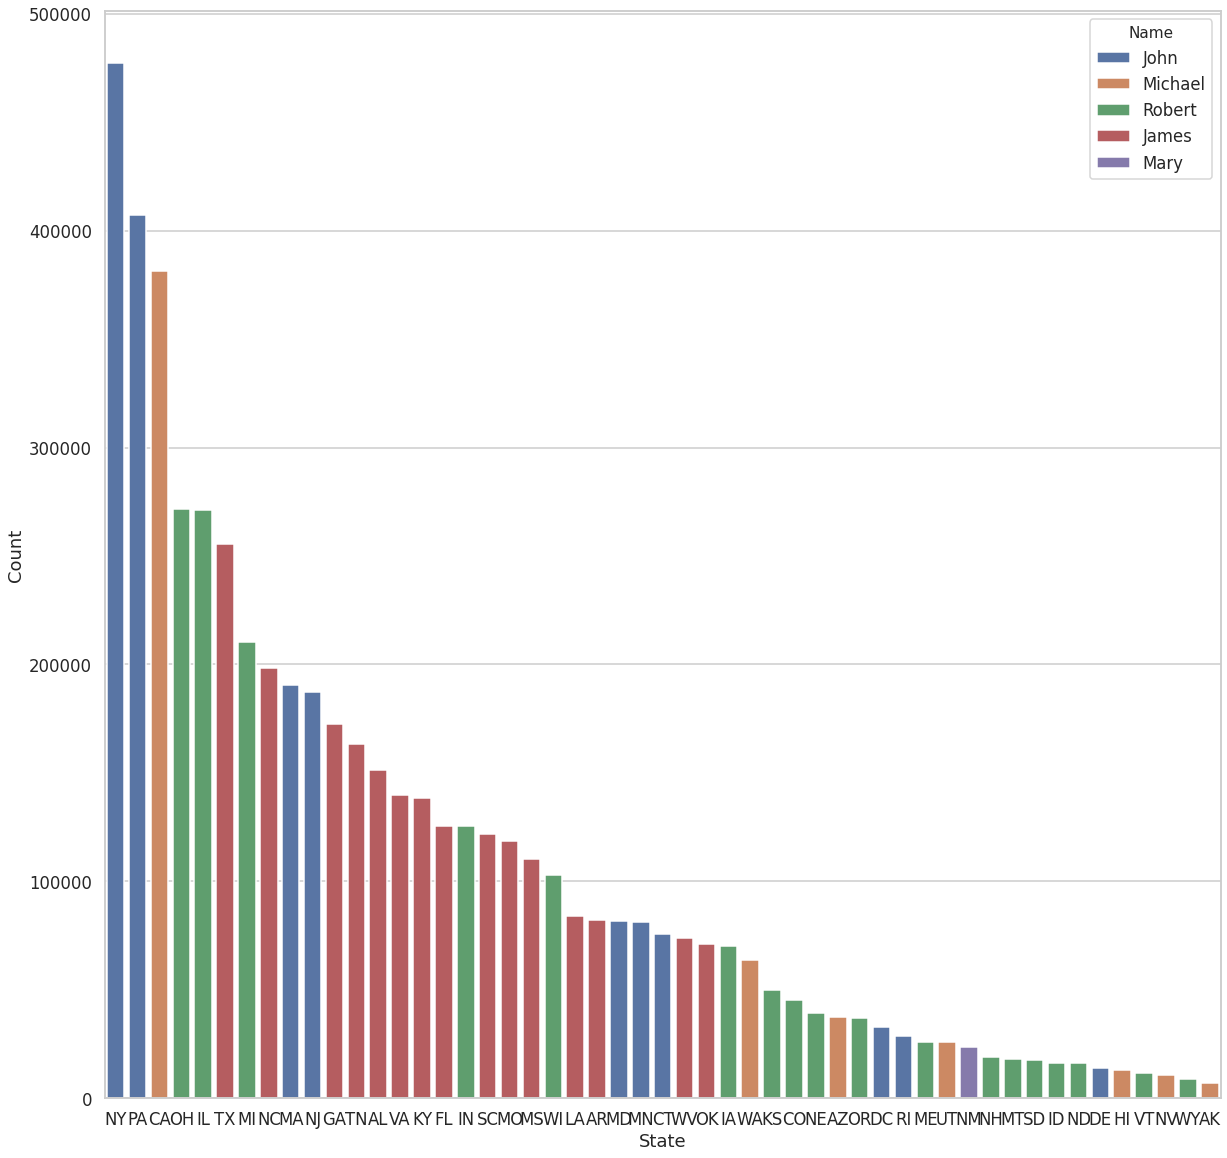

In [131]:
# set environment 
sns.set(rc={'figure.figsize':(20,20)})
sns.set(style="whitegrid")
sns.set_context("talk")

# Plot for Task1 - top names for each state before 1999
b1999=sns.barplot(x="State", y="Count", hue="Name", data=before_1999, dodge=False)

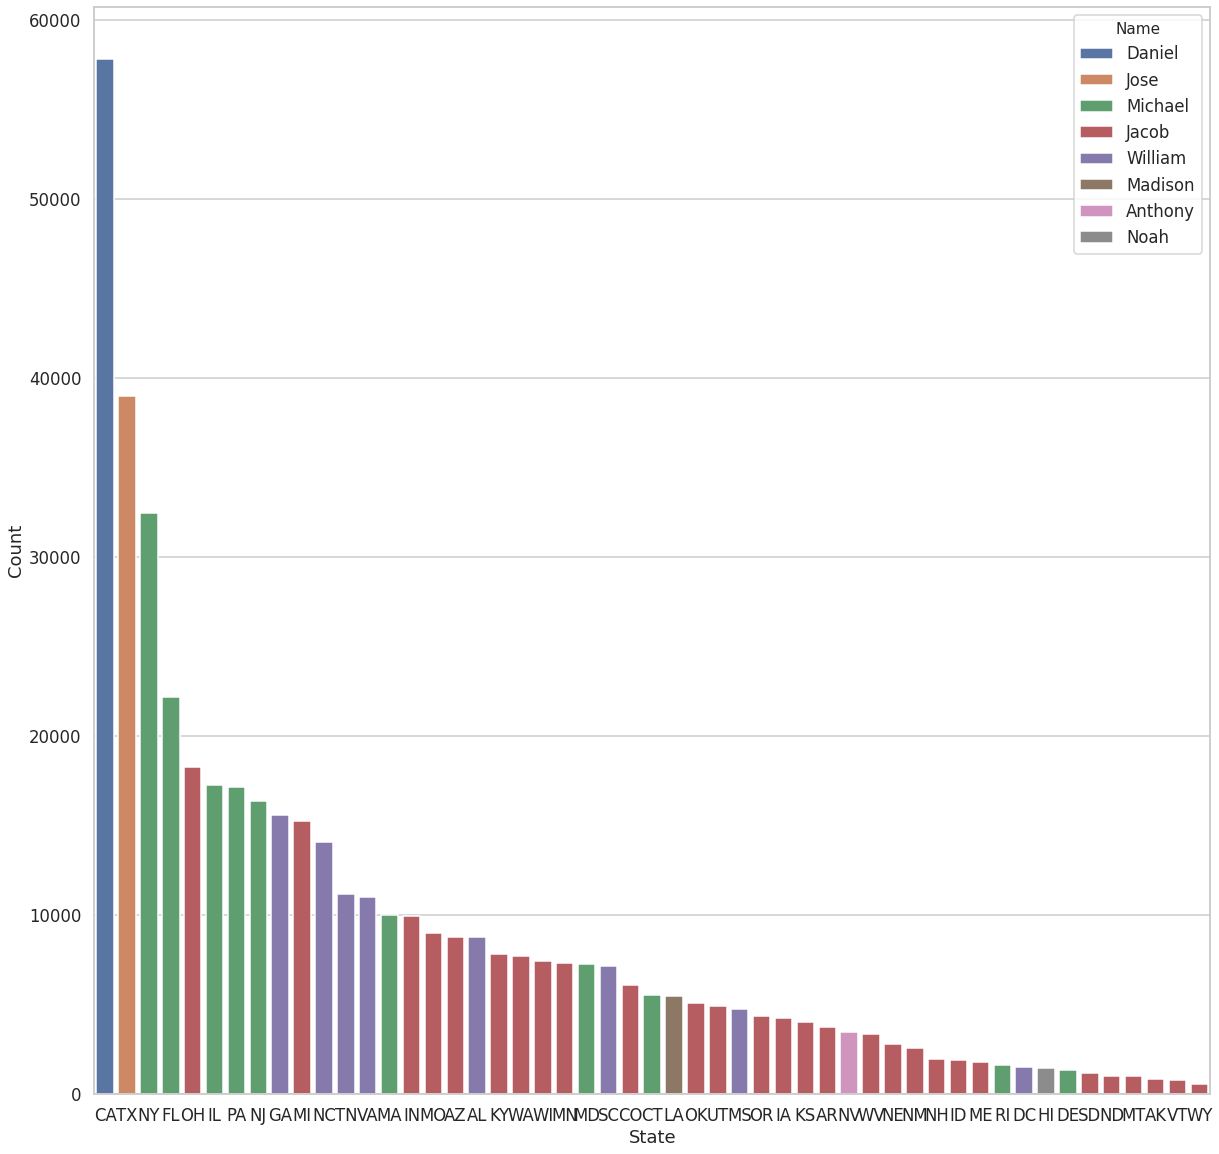

In [132]:
# Plot for Task1 - top names for each state after 1999
a1999=sns.barplot(x="State", y="Count", hue="Name", data=after_1999, dodge=False)

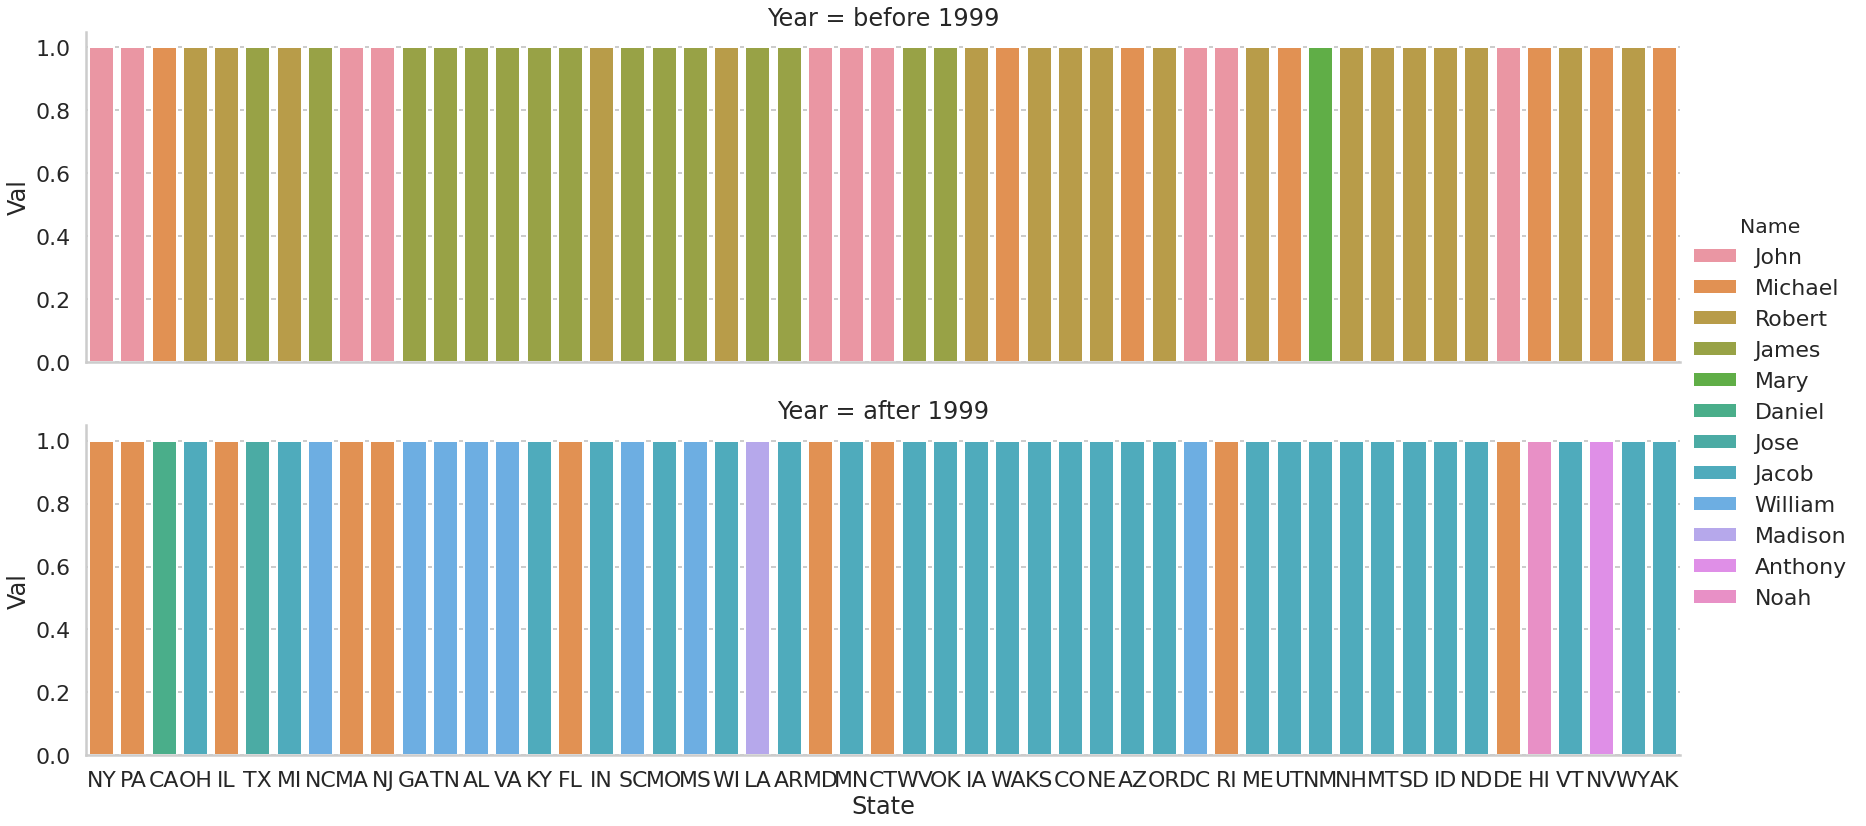

In [133]:
# Plot for Task1 - facet with top names for each state before 1999 and after 1999 
# (counts = const, we care only about names)
sns.set_context("poster")
facet_1999 = sns.catplot(x="State", y="Val", row='Year', hue='Name', kind='bar',data=all_1999, height=6, 
    aspect=4, dodge=False)


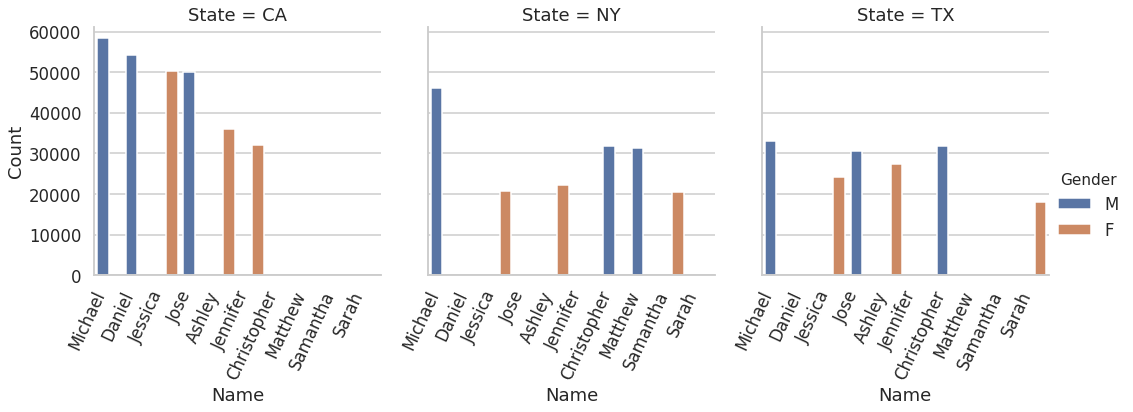

In [134]:
# Plot for Task2 - top3 names for 3 states in 1990-2000 years
sns.set_context("talk")
facet_top3 = sns.catplot(x="Name", y="Count", col='State', hue='Gender', kind='bar',data=top3)
facet_top3.set_xticklabels(rotation=65, horizontalalignment='right')

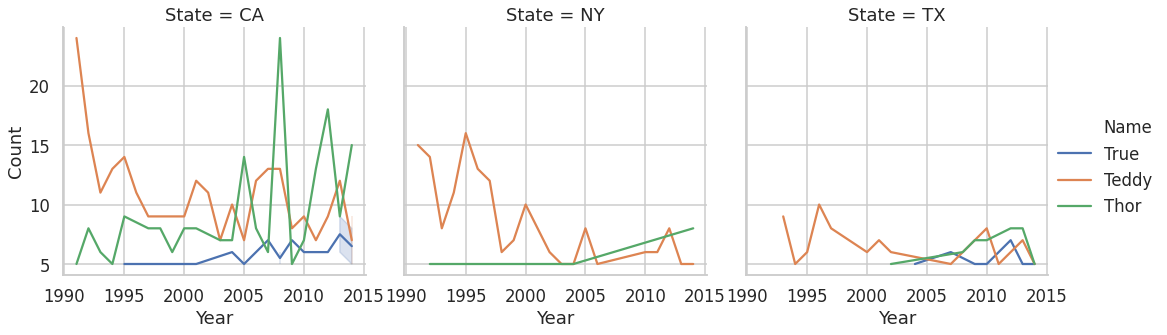

In [135]:
# Plot for Task3 -  dynamics of three names for 3 states 
ax = sns.relplot(x="Year", y="Count", hue="Name", col='State', kind='line', data=dyn)